In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#read data
energy_data = pd.read_csv(
    "D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2020_Excel.csv",
    sep=";")


#rename
energy_data.rename(columns={"Datum (MT+1)": "DatumUhrzeit", "Import Saldo": "ImportSaldo",
                            "Nicht Erneuerbar": "NichtErneuerbar",
                            "Day Ahead Auktion (DE-LU)": "DayAheadAuktion"}, inplace=True)

In [4]:
'''Hier erstelle ich eine neue Spalte mit den Monaten als Zahl um sie als Boxplot wiedergeben zu können'''
energy_data['DatumUhrzeit'] = pd.to_datetime(energy_data['DatumUhrzeit'])
energy_data['MonatZahl'] = energy_data['DatumUhrzeit'].dt.month

#print(energy_data)

## Describe

In [5]:
#all data described
described_data = energy_data.describe()
#print(described_data)

In [6]:
#describe monthly cost
grouped = energy_data.groupby(energy_data['MonatZahl'])
describe_month = grouped['DayAheadAuktion'].describe()
print(describe_month)

            count       mean        std    min      25%     50%      75%  \
MonatZahl                                                                  
1          2976.0  34.978710  11.566352  -8.77  28.7800  34.450  42.9025   
2          2784.0  21.911839  16.056908 -32.14  10.4775  25.345  34.0125   
3          2976.0  22.519315  13.797903 -55.05  16.7700  24.035  31.3100   
4          2880.0  17.049194  16.629011 -83.94  12.7000  19.935  24.9200   
5          2976.0  17.604879  13.724651 -74.97  14.0075  19.200  23.2050   
6          2880.0  26.229167  10.840969 -48.17  20.1350  26.200  33.6525   
7          2976.0  30.074946  14.915361 -64.99  25.4000  31.730  38.8400   
8          2976.0  34.889704  11.553157 -16.18  28.0000  34.200  41.0000   
9          2880.0  43.678097  18.114272 -58.80  34.0075  41.500  51.0900   
10         2976.0  33.955901  14.428444 -54.97  27.8100  34.520  43.7800   
11         2880.0  38.796514  14.949273 -10.48  32.0500  39.375  46.8500   
12         2

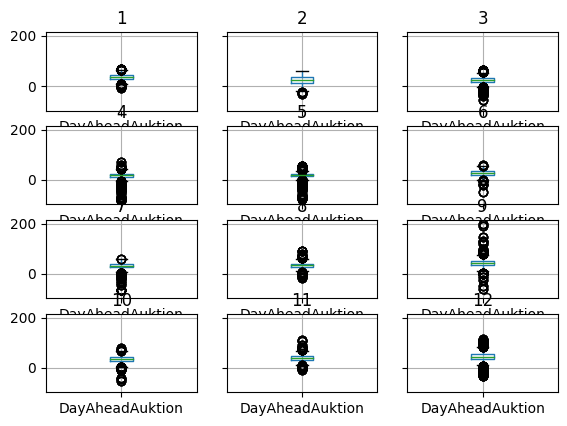

In [7]:
'''GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data.groupby(energy_data["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

### Betrachtung 2019

In [8]:
#read data
energy_data19 = pd.read_csv(
    "D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2019_Excel.csv",
    sep=";")


#rename
energy_data19.rename(columns={"Datum (MT+1)": "DatumUhrzeit", "Import Saldo": "ImportSaldo",
                            "Nicht Erneuerbar": "NichtErneuerbar",
                            "Day Ahead Auktion (DE-LU)": "DayAheadAuktion"}, inplace=True)

'''Hier erstelle ich eine neue Spalte mit den Monaten als Zahl'''
energy_data19['DatumUhrzeit'] = pd.to_datetime(energy_data19['DatumUhrzeit'])
energy_data19['MonatZahl'] = energy_data19['DatumUhrzeit'].dt.month


In [9]:
#Beschreibung der einzelnen Monate in 2019
grouped19 = energy_data19.groupby(energy_data19['MonatZahl'])
descr_data19 = grouped19['DayAheadAuktion'].describe()
print(descr_data19)

            count       mean        std    min      25%     50%      75%  \
MonatZahl                                                                  
1          2976.0  49.413844  22.251447 -48.93  42.9775  51.145  60.0775   
2          2688.0  42.814613  11.938874  -4.09  37.9875  43.090  50.4400   
3          2976.0  30.614852  15.347294 -23.04  24.4925  34.345  41.2000   
4          2880.0  36.972819  14.948026 -83.01  34.0000  38.540  44.3700   
5          2976.0  37.832083  11.165737 -22.96  33.9150  37.685  44.9275   
6          2880.0  32.504458  19.819410 -90.01  28.0100  33.535  41.0600   
7          2976.0  39.713065   9.083477   6.77  33.6500  38.350  45.7575   
8          2976.0  36.818696  12.653041 -49.62  30.5625  36.285  43.4650   
9          2880.0  35.765667  12.487440 -37.29  29.2050  34.915  44.1475   
10         2976.0  36.947540  12.789347 -34.57  28.7625  36.670  46.9900   
11         2880.0  41.004833  11.304552   1.40  34.8000  40.115  48.3925   
12         2

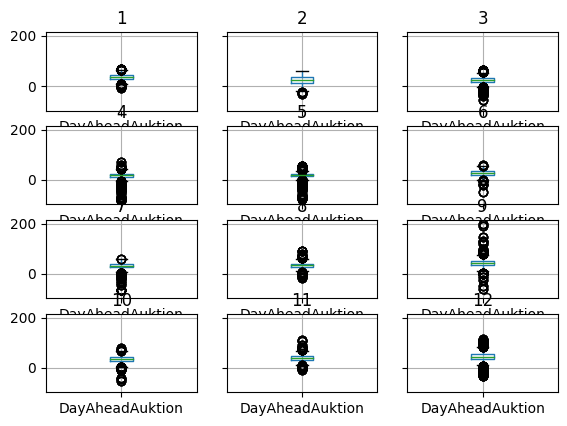

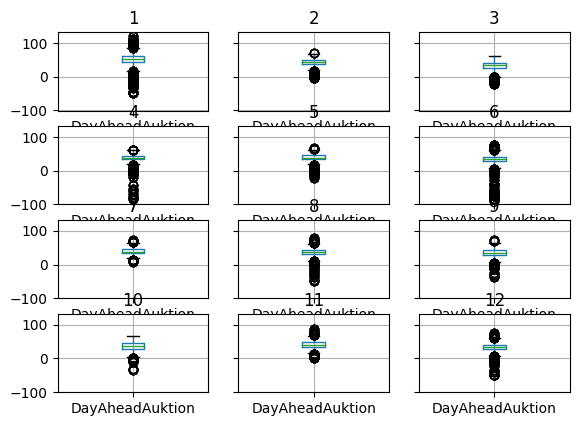

In [22]:

'''2020: GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data.groupby(energy_data["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

'''2019: GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data19.groupby(energy_data19["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

### Betrachtung 2019 und 2020 

In [20]:
#Zusammenführung der beiden DataFrame im Preis 
energy_1920 = pd.DataFrame()
energy_1920['Preis19'] = energy_data19['DayAheadAuktion']
energy_1920['Preis20'] = energy_data['DayAheadAuktion']
energy_1920['MonatZahl'] = energy_data['MonatZahl']
#print(energy_1920)

# Summe groupby Monat
grouped_1920 = energy_1920.groupby(energy_1920['MonatZahl'])
monthly_19 = grouped_1920['Preis19'].sum()
monthly_20 = grouped_1920['Preis20'].sum()

# Sum als DataFrame zur Übersicht
sum_1920 = pd.DataFrame()
sum_1920['Sum_19'] = monthly_19
sum_1920['Sum_20'] = monthly_20
print(sum_1920)



              Sum_19     Sum_20
MonatZahl                      
1          147055.60  104096.64
2          119506.48   61002.56
3           90317.84   67017.48
4          105240.68   49101.68
5          113048.44   52392.12
6           93931.92   75540.00
7          119317.88   89503.04
8          108173.20  103831.76
9          104193.28  125792.92
10         108925.04  101052.76
11         119101.92  111733.96
12          91079.64  125057.44


- 2019 einiges Teurer als 2020

## Korrelationen

In [11]:
'''Hier schaue ich nach der Korrelation zwischen Preis und allen Monaten ; corr = ca. 0.352877'''
corr_price_allmonths = energy_data['DayAheadAuktion'].corr(energy_data['MonatZahl'])


### Korrelation gesamte Einspeisemenge pro Monat

In [12]:
#Neue Spalte mit der gesamten Einspeisemenge pro Monat
energy_data['sum_energy'] = energy_data['Kernenergie'] + energy_data['NichtErneuerbar'] + energy_data['Erneuerbar']
#print(energy_data)

In [13]:
#Korrelation gesamte Einspeisemenge und Preis pro Monat
monthly_correlation = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['sum_energy']))
print(monthly_correlation)

MonatZahl
1     0.361788
2     0.277382
3     0.044077
4    -0.412875
5    -0.097278
6     0.166352
7    -0.139811
8     0.062338
9     0.095437
10    0.363117
11    0.560279
12    0.464622
dtype: float64


- Jan + Feb = mittlere positive Korr
- März, Mai, Aug, Sep  = sehr nahe 0 (0.0..)
- April = mittlere neg Korr
- Jun, Jul = schwache Korr (Jun pos, Jul neg)
- Okt, Nov, Dez = mittlere pos Korr

### Korrelation einzelne Stromarten

In [14]:

corr_Kern = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['Kernenergie']))
corr_NEE = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['NichtErneuerbar']))
corr_EE = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['Erneuerbar']))

korr_df = pd.DataFrame()
korr_df['Kernenergie'] = corr_Kern
korr_df['NichtErneuerbar'] = corr_NEE
korr_df['Erneuerbar'] = corr_EE
print(korr_df)

           Kernenergie  NichtErneuerbar  Erneuerbar
MonatZahl                                          
1             0.486067         0.802410   -0.519095
2             0.798983         0.816219   -0.605900
3             0.667403         0.814526   -0.638691
4             0.552308         0.661363   -0.635914
5             0.128467         0.701089   -0.467538
6            -0.058374         0.811154   -0.385433
7             0.247633         0.814591   -0.535439
8             0.265481         0.797882   -0.380815
9             0.044174         0.687141   -0.384536
10            0.130150         0.825660   -0.477425
11            0.571606         0.864198   -0.550152
12            0.529557         0.781764   -0.625898


- Kern = größere Variabilität, pos, eher schwache Korr Mai-Okt, mittlere Nov - April, 
min: Jun (-0.05), max: Feb(0.79), Spannweite = 0.84

- NEE = wenig Variabilität, starke pos Korr, 
min: April (0.66), max: Nov (0.86), Spannweite = 0.2

- EE = wenig Variabilität, neg, mittlere - starke Korr, 
min: Aug (-0.38), max: März (-0.63), Spannweite = 0.25

### Inwiefern beeinflusst der vergangene Energiepreis den zukünftigen Energiepreis?

In [24]:

#ChatGPT: 

# Verschieben der Datenreihe um eine Zeile, um den vergangenen Wert zu erhalten
energy_data['DayAheadAuktion_Lag1'] = energy_data['DayAheadAuktion'].shift(1)

# Korrelation berechnen
correlation = energy_data['DayAheadAuktion'].corr(energy_data['DayAheadAuktion_Lag1'])

print(correlation)


0.9863582529744177



- sehr starke positive Korrelation! 